In [2]:
import cantera as ct    # import cantera
import math             # import math (sqrt, exp, etc.)
import scipy.optimize as optimize
from scipy.optimize import fsolve     # solves nonlinear equations
from scipy.optimize import curve_fit  # does curve fitting
import scipy.integrate as integrate
import matplotlib.pyplot as plt      # does matlab-like plotting
import numpy as np                    # does a bunch of array stuff
from scipy.integrate import ode       # solves ODEs

#%matplotlib inline # WINDOWS ONLY!!!! force matplotlib to show the plot in Jupyter inline: 

### Setting Up a Gas Mixture

The first thing to do with Cantera is to define a gas object. Remember that we defined cantera with the shorthand ct. 

In [3]:
gas = ct.Solution('gri30_highT.yaml') 
#Note: gas can be named anything, it doesn't have to be gas

The 'gri30_highT.cti' is a file that contains the elements, species, thermodynamic data (curvefits of Cp), and the chemical reaction mechanism. We will go over these files and how to modify them at a later date. The above function reads data from the file gri30_highT.cti and defined the mixture based off of that. To view the current state of gas type *gas()*


In [4]:
gas() 


  gri30:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.081894 kg/m^3
  mean mol. weight   2.016 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             26469             53361  J
   internal energy       -1.2108e+06        -2.441e+06  J
           entropy             64910        1.3086e+05  J/K
    Gibbs function       -1.9447e+07       -3.9204e+07  J
 heat capacity c_p             14311             28851  J/K
 heat capacity c_v             10187             20536  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2                 1                 1           -15.717
     [  +52 minor]                 0                 0  



**NOTE:** The enthalpy, internal energy, etc. are per kmol and kg of the **mixture**.  

The species_names fuction will provide a list of the species for the gas.

In [4]:
print(gas.species_names)

['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CH4', 'CO', 'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH', 'C2H', 'C2H2', 'C2H3', 'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2', 'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN', 'HCNO', 'HOCN', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO', 'CH3CHO']


### Thermodynamic Properties 

To set the state with a specific temperature, pressure, and mole fraction (actually moles) use the gas.TPX function.  The number of moles are normalized to unity.  There are lots of other ways to set the cantera mixture.  See http://www.cantera.org/docs/sphinx/html/cython/thermo.html

In [5]:
T = 1000
P = 1013250
gas.TPX = T, P, {'CH4':1, 'O2':2, 'N2':2*3.76}
gas()


  gri30:

       temperature   1000 K
          pressure   1.0133e+06 Pa
           density   3.3676 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        5.8795e+05        1.6247e+07  J
   internal energy        2.8706e+05        7.9325e+06  J
           entropy            7971.8        2.2029e+05  J/K
    Gibbs function       -7.3839e+06       -2.0404e+08  J
 heat capacity c_p            1340.7             37049  J/K
 heat capacity c_v            1039.8             28734  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -25.923
               CH4          0.055187          0.095057           -34.235
                N2           0.72467           0.71483           -22.884

Cantera can also ouput the property that you are interested in. **Note** these are per unit kg (or kmol) of the **mixture**.

In [6]:
enthalpy = gas.h
print(enthalpy)

587946.4984523177


Use the gas.basis() function to determine wether the output is molar or mass based.

In [7]:
print(gas.basis)

mass


This can be changed with the basis function, which accepts inputs of 'molar' or 'mass'.  

In [8]:
gas.basis = 'molar' # 'mass'
print(gas.basis)
print('mixture MW', gas.mean_molecular_weight, 'kg/kmol mix')
print('mixture enthalpy', gas.h, 'J/kmol mix')
print('mixture internal energy', gas.u, 'J/kmol mix')
print('mixure constant pressure specific heat', gas.cp, 'J/kmol K')
print('mixutre entropy', gas.s, 'J/kmol K mix')

molar
mixture MW 27.633486692015207 kg/kmol mix
mixture enthalpy 16247011.74059906 J/kmol mix
mixture internal energy 7932549.122445821 J/kmol mix
mixure constant pressure specific heat 37048.71220862211 J/kmol K
mixutre entropy 220288.7235131813 J/kmol K mix


Note that the value of the enthalpy changed in the above cell in comparison to the previous result.  This is because the enthalpy now has units J/kmol for the mixture.  Some properties can also be explicitly computed on a mass or molar basis.  Examples are below.



In [9]:
print('mixture density:', gas.density_mass, 'kg/m^3')
print('mixture concentration:', gas.density_mole, 'kmol/m^3')
print('specific volume mass:', gas.volume_mass, 'm^3/kg')
print('specific volume molar:', gas.volume_mole, 'm^3/kmol')
print('h mass:', gas.enthalpy_mass, ' J/kg mix')
print('h molar:', gas.enthalpy_mole, 'J/kmol mix')
print('e mass:', gas.int_energy_mass, ' J/kg mix')
print('e molar:', gas.int_energy_mole, ' J/kg mix')
print('s mass:', gas.entropy_mass, ' J/kg K mix')
print('s molar:', gas.entropy_mole, ' J/kmol K mix')
print('Cv mass:', gas.cv_mass, 'J/kg K')
print('Cv molar:', gas.cv_mole, 'J/kmol K')
print('Cp mass:', gas.cp_mass, 'J/kg K')
print('Cp molar:', gas.cp_mole, 'J/kmol K')
print('Gibbs Free Energy Mass:', gas.gibbs_mass, 'J/kg K mix')
print('Gibbs Free Energy Mole:', gas.gibbs_mole, 'J/kmol K mix')

mixture density: 3.367581487413497 kg/m^3
mixture concentration: 0.12186596374704216 kmol/m^3
specific volume mass: 0.2969490133312437 m^3/kg
specific volume molar: 8.205736608095968 m^3/kmol
h mass: 587946.4984523177  J/kg mix
h molar: 16247011.74059906 J/kmol mix
e mass: 287062.91069443506  J/kg mix
e molar: 7932549.122445821  J/kg mix
s mass: 7971.803412590511  J/kg K mix
s molar: 220288.7235131813  J/kmol K mix
Cv mass: 1039.8343832149033 J/kg K
Cv molar: 28734.249590468873 J/kmol K
Cp mass: 1340.717970972786 J/kg K
Cp molar: 37048.71220862211 J/kmol K
Gibbs Free Energy Mass: -7383856.914138193 J/kg K mix
Gibbs Free Energy Mole: -204041711.77258223 J/kmol K mix


The species mass and mole fractions are stored in a large array gas.X and gas.Y.  The ordering of the species matches the species list shown above.

In [10]:
gas.X

array([0.        , 0.        , 0.        , 0.19011407, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09505703, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.7148289 , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

This isn't very useful for visual inspection.  We don't know which species is which.  A more useful to visually inspect the mass or mole fractions is use the mole_fraction_dict() or mass_fraction_dict() functions. 





In [11]:
gas.mole_fraction_dict()

{'CH4': 0.09505703422053231,
 'N2': 0.714828897338403,
 'O2': 0.19011406844106463}

In [12]:
gas.mass_fraction_dict()

{'CH4': 0.05518666598235155,
 'N2': 0.7246720963310207,
 'O2': 0.22014123768662783}

You can get the index of that species using gas.species_index('SpeciesName').  **Note:** This command is case sensitive and MUST exactly match a species name or else an error message will be thrown.

In [13]:
nCH4 = gas.species_index('CH4')
nCO = gas.species_index('CO')
nCO2 = gas.species_index('CO2')
nH2  = gas.species_index('H2')
nH   = gas.species_index('H')
nC3H8 = gas.species_index('C3H8')
nC2H6 = gas.species_index('C2H4')
nH2O = gas.species_index('H2O')


Now that we have the species index we can grab some species specific properties for each species. These properties can be used to find the properties of a particular species.  

With the exception of the mass and mole fraction the properties are on a molar basis.  The enthalpy, entropy, internal eneergy, Cp, and MW for each species are computed even if the mole fraction is zero.  

In [14]:
print('Species Name:', gas.species_names[nCH4])
print('X_CH4', gas.X[nCH4])
print('Y_CH4', gas.Y[nCH4])
print('MW_CH4', gas.molecular_weights[nCH4], 'kg/kmol')
print('h_CH4', gas.partial_molar_enthalpies[nCH4], 'J/kmol')
print('e_CH4', gas.partial_molar_int_energies[nCH4], 'J/kmol')
print('s_CH4', gas.partial_molar_entropies[nCH4], 'J/kmol K')
print('Cp_CH4', gas.partial_molar_cp[nCH4], 'J/kmol K')

Species Name: CH4
X_CH4 0.09505703422053231
Y_CH4 0.05518666598235155
MW_CH4 16.043 kg/kmol
h_CH4 -35948444.66514413 J/kmol
e_CH4 -44262907.28329737 J/kmol
s_CH4 248700.31479914457 J/kmol K
Cp_CH4 73616.66965658606 J/kmol K


The species specific properties can be used to plot the properties of each gas species. Below is an example that computes and plots the $\bar{C_p}$ for severa species.

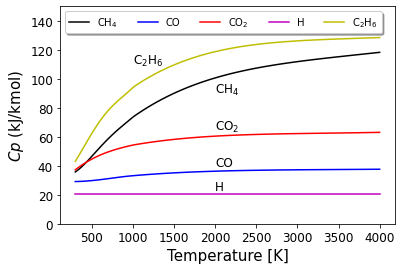

In [15]:
# define the number of plot points and the upper and lower temperature bounds
npts = 100
Tlow = 300
Thigh = 4000
p = 101325

# pre-allocate the arrays for each spec
Tarr = np.linspace(Tlow, Thigh,npts)
Cparr = np.zeros(npts)
Cp_CO = np.zeros(npts)
Cp_CO2 = np.zeros(npts)
Cp_CH4 = np.zeros(npts)
Cp_H   = np.zeros(npts)
Cp_C3H8 = np.zeros(npts)
Cp_C2H6 = np.zeros(npts)

# Now loop throuh the temperature array and compute the species Cp and set the values
# into the array
for i in range(npts):
    # Set the temperature and pressure
    T = Tarr[i]
    gas.TP = T, p # don't need to set the mixture
    cps = gas.partial_molar_cp  # this get an array of Cp for each species. 
    Cp_CO[i] = cps[nCO]
    Cp_CO2[i] = cps[nCO2]
    Cp_CH4[i] = cps[nCH4] 
    Cp_H[i] = cps[nH]
    Cp_C2H6[i] = cps[nC2H6]

    
# Everythin below is just a plotting command.
    
# To plot multiple lines.  The plot function keeps "stacking" the lines until there is show
# command.  Note: It is annoying, but more often than not, more than half of your codes for
# this course will be plot commands.  Note that Cp values in the plot are divided by 1000
# to put them on a kJ basis.  
plt.plot(Tarr,Cp_CH4/1000,'k',label='CH$_4$')
plt.plot(Tarr,Cp_CO/1000,'b',label='CO')
plt.plot(Tarr,Cp_CO2/1000,'r',label='CO$_2$')
plt.plot(Tarr,Cp_H/1000,'m',label='H')
plt.plot(Tarr,Cp_C2H6/1000,'y',label='C$_2$H$_6$')

# label the x-axis and the y-axis
plt.xlabel('Temperature [K]',fontsize=15)
plt.ylabel('$Cp$ (kJ/kmol)',fontsize=15)

# set the y plotting limit
plt.ylim(0,150)

# set the font size for the x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# For annotating the plot, please use either a legend 
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=5, shadow=True,  fancybox=True,fontsize='medium')

# OR annotatet the lines.  Either or is fine.  Just make sure the
# legend box or the annotations to not interfere with the plot. 
plt.annotate('CH$_4$', xy=(2000, 80), xytext=(2000, 90), 
             color='k', fontsize=12)
plt.annotate('CO', xy=(2000, 40), xytext=(2000, 40), 
             color='k', fontsize=12)
plt.annotate('CO$_2$', xy=(2000, 65), xytext=(2000, 65), 
             color='k', fontsize=12)
plt.annotate('H', xy=(2000, 23), xytext=(2000, 23), 
             color='k', fontsize=12)
plt.annotate('C$_2$H$_6$', xy=(1000,110), xytext=(1000, 110), 
             color='k', fontsize=12)
plt.show()

### Chemical Equilbrium

To equilibrate the mixture use the gas.equilibrate function.  The argument to this function is one of the following character strings ['TP','TV','HP','SP','SV','UV'].  These correspond to the variables that are being held constant for the equilibration.  For example, the do constant enthalpy and pressure equilibration of stoichiometric methane-air use the following.  Remember to set the state of the reactants.

**IMPORTANT:** The equilibrate functions change the gas to the equilibrium mixture.  So the temperature, mole fractions, pressure, etc. will be those of the equilibrium state.  If you need to sweep over parameters (e.g., equilvalence ratio) than you will need to reset the pressure, temperature, and mole fractions back to their reactant state.

Below is an example of stochiometric methane-air

In [16]:
# set the gas mixture
gas.TPX = 300, 101325, {'CH4':1, 'O2':2, 'N2':3.76*2}

# equilibrate the mixturer
gas.equilibrate('HP')

# print the results
print('adiabatic flame temperature = ', gas.T)
print('equilibrium H2O mole fraction = ', gas.X[nH2O])
print('equilibrium CO2 mole fraction = ', gas.X[nCO2])
print('equilibrium CO mole fraction = ', gas.X[nCO])
print('equilibruim CH4 mole fraction = ', gas.X[nCH4])
gas()

adiabatic flame temperature =  2225.582373232687
equilibrium H2O mole fraction =  0.1834638248272098
equilibrium CO2 mole fraction =  0.08535318720214076
equilibrium CO mole fraction =  0.008998390826586447
equilibruim CH4 mole fraction =  3.0031999306718753e-17

  gri30:

       temperature   2225.6 K
          pressure   1.0133e+05 Pa
           density   0.15019 kg/m^3
  mean mol. weight   27.428 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -2.5459e+05       -6.9829e+06  J
   internal energy       -9.2924e+05       -2.5487e+07  J
           entropy            9876.4        2.7089e+05  J/K
    Gibbs function       -2.2235e+07       -6.0988e+08  J
 heat capacity c_p            1514.3             41536  J/K
 heat capacity c_v            1211.2             33222  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ----

Now we will do a more complicated example where the adiabatic flame temperature is computed as a function of equivalence ratio.  This is made easier by the set_equilvalence_ratio function, but first we have to define oxidizer and fuel mixtures.

In [17]:
# define a fuel.  Here we will define it as a 50/50 molar mix of methane and ethane (CH4, C2H6).
fuel = 'CH4:1, C2H6:1'

#define an oxidizer.  Here we use surrogate air
ox   = 'O2:1, N2:3.76'

# set the temperature and pressure to those of the reactants
gas.TP = 300, 101325

# set the mixture based on the equivalence ratio
gas.set_equivalence_ratio(1., fuel, ox)

# now to the equilibrium
gas.equilibrate('HP')

print('adiabatic flame temp = ', gas.T, ' K')

adiabatic flame temp =  2247.3653814827717  K


Now lets loop over the equivalence ratios and make a plot. Note, it usualy works best to plot on a log scale for the equivalence ratio.

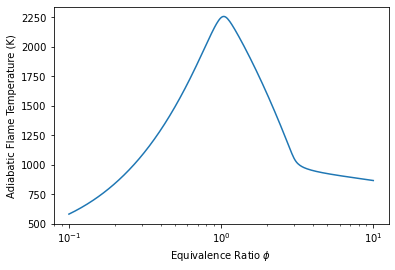

In [18]:
npts = 300
Tarr = np.zeros(npts)
phi = np.logspace(-1,1,npts) # space the points in log space from 10^-1 to 10

To = 300
p  = 101325
for i in range(npts):
    gas.TP = To, p  # reset the temperature and pressure
    gas.set_equivalence_ratio(phi[i], fuel, ox) # set the mixture composition
    
    gas.equilibrate('HP') # perform the chemical equilibrium
    
    Tarr[i] = gas.T # store the temperature
    

plt.semilogx(phi, Tarr)
plt.xlabel('Equivalence Ratio $\phi$')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.show()